In [28]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(X_train, y_train) , (X_test,y_test) = keras.datasets.cifar10.load_data() 

170500096/170498071 [==============================] - 142s 1us/step


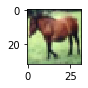

In [80]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[7])

In [25]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1) 

In [27]:
X_train = X_train / 255.0
X_test = X_test / 255.0 

In [67]:
cnn = keras.models.Sequential([
    layers.Convolution2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)), 
    layers.Dropout(0.2), 
    
    layers.Convolution2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)), 
    layers.Dropout(0.2), 
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2), 
    layers.Dense(10, activation='softmax')
])

In [68]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [69]:
cnn.fit(X_train, y_train, epochs=20) 

Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 152s 3ms/sample - loss: 1.4886 - accuracy: 0.4606
Epoch 2/20
50000/50000 [==============================] - 150s 3ms/sample - loss: 1.1509 - accuracy: 0.5924
Epoch 3/20
50000/50000 [==============================] - 153s 3ms/sample - loss: 1.0214 - accuracy: 0.6414
Epoch 4/20
50000/50000 [==============================] - 156s 3ms/sample - loss: 0.9401 - accuracy: 0.6706
Epoch 5/20
50000/50000 [==============================] - 153s 3ms/sample - loss: 0.8716 - accuracy: 0.6956
Epoch 6/20
50000/50000 [==============================] - 157s 3ms/sample - loss: 0.8228 - accuracy: 0.7094
Epoch 7/20
50000/50000 [==============================] - 159s 3ms/sample - loss: 0.7656 - accuracy: 0.7294
Epoch 8/20
50000/50000 [==============================] - 152s 3ms/sample - loss: 0.7302 - accuracy: 0.7400
Epoch 9/20
50000/50000 [==============================] - 152s 3ms/sample - loss: 0.6981 - accuracy: 0.7525
Epoch

In [70]:
cnn.evaluate(X_test,y_test,verbose=0)

[0.8632079184532165, 0.7349]

In [71]:
y_pred = cnn.predict(X_test)

In [72]:
y_scores = [np.argmax(i) for i in y_pred]
y_scores[:5]

[3, 8, 9, 0, 6]

In [73]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)